In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 数据预处理

In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 检查数据异常、缺失

In [25]:
titanic=pd.concat([train_data,test_data],axis=0)
print(titanic.shape)
titanic.info()

(1309, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [52]:
#可以发现Age有一定的缺失，对Age进行填充
#使用平均数或者中位数补充空数据对模型偏离造成的影响较小
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


/tmp/ipykernel_33/569263620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
/tmp/ipykernel_33/569263620.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

## 查看特征与标签间的关系

<Axes: xlabel='Embarked', ylabel='Survived'>

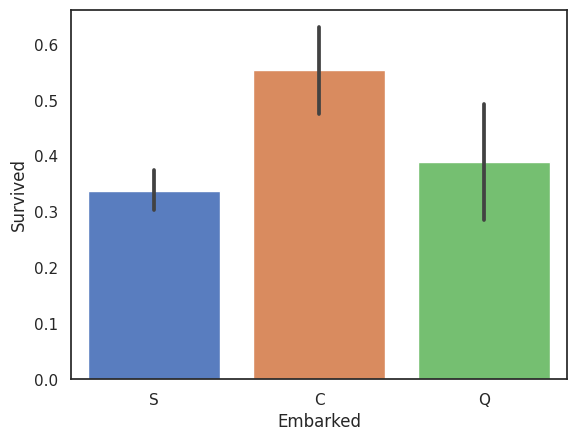

In [42]:
#法国登船乘客生存率较高
sns.barplot(data=train_data,x='Embarked',y='Survived')

<Axes: xlabel='Parch', ylabel='Survived'>

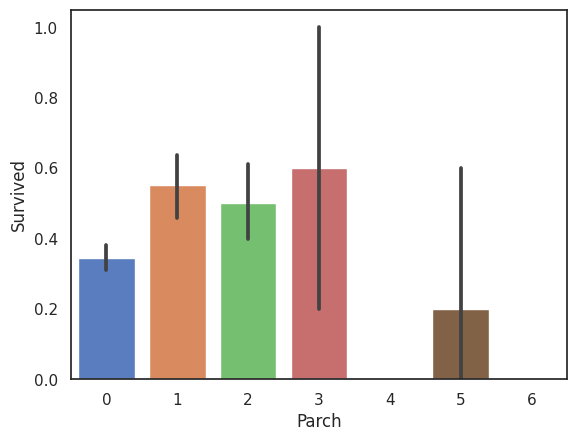

In [43]:
#乘客同行的父母及子女数量适中时生存率较高
sns.barplot(data=train_data,x='Parch',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

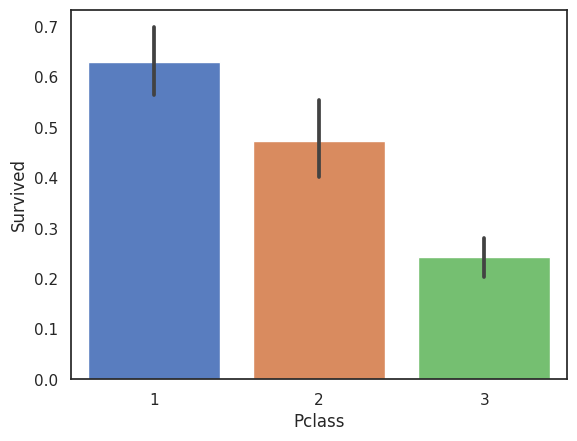

In [44]:
#乘客客舱等级越高生存率越高
sns.barplot(data=train_data,x='Pclass',y='Survived')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

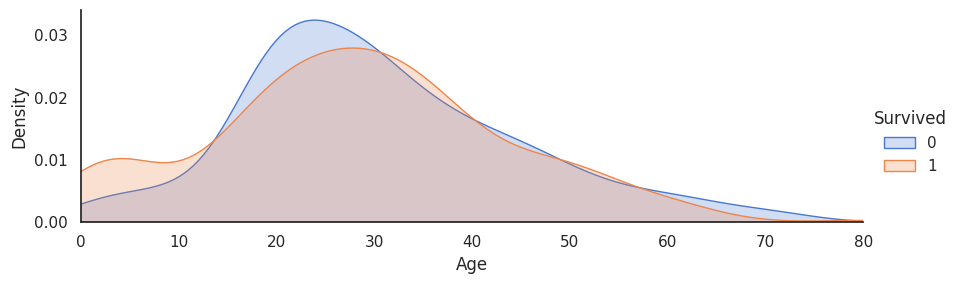

In [49]:
#观察各个年龄段生存率
age=sns.FacetGrid(train_data,hue='Survived',aspect=3)
age.map(sns.kdeplot,'Age',shade=True)
age.set(xlim=(0,train_data['Age'].max()))
age.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

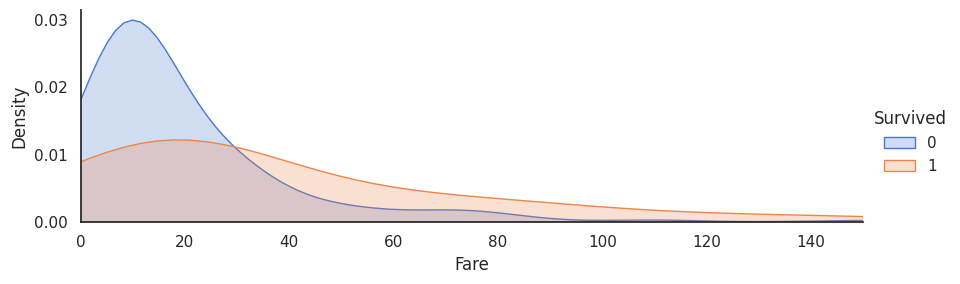

In [50]:
#发现票价较低时生存率较低，票价较高时生存率较高
ageFacet=sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

In [6]:
#选择Sex为female的行并返回Survived列的数据
women=train_data.loc[train_data.Sex=='female']['Survived']
rate_women=sum(women)/len(women)
print("% of women who survived",rate_women)

% of women who survived 0.7420382165605095


In [8]:
men=train_data.loc[train_data.Sex=='male']['Survived']
rate_men=sum(men)/len(men)
print("% of men who survived",rate_men)

% of men who survived 0.18890814558058924


可以看到女性的存活率远远高于男性

# 接下来构建随机森林模型

In [55]:
from sklearn.ensemble import RandomForestClassifier
y=train_data['Survived']
#选取船舱等级，性别，兄弟姐妹个数，父母子女个数,年龄,票价作为决策树特征
features=['Pclass','Sex','SibSp','Parch','Age','Fare']
#将选取的类别特征转换为为独热编码
X=pd.get_dummies(titanic[features].iloc[:train_data.shape[0]],columns=['Pclass','Sex'])
X_test=pd.get_dummies(titanic[features].iloc[train_data.shape[0]:],columns=['Pclass','Sex'])
#构建随机森林，设置
model=RandomForestClassifier(n_estimators=100,max_depth=6,random_state=1)
#模型训练
model.fit(X,y)
predictions=model.predict(X_test)
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv',index=False)

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SibSp       418 non-null    int64  
 1   Parch       418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   Pclass_1    418 non-null    bool   
 5   Pclass_2    418 non-null    bool   
 6   Pclass_3    418 non-null    bool   
 7   Sex_female  418 non-null    bool   
 8   Sex_male    418 non-null    bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 18.4 KB
